In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import itertools
%matplotlib inline
sns.set_style("white", {
        "font.family": "serif",
        "font.serif": ["Times", "Palatino", "serif"]
})

In [3]:
df = pd.read_csv('24node.csv')
df['strategy'] = df['description'].apply(lambda x: 'centralised observations' if x=='fdd_0' else 'decentralised observations')
central = df[df['description']=='fdd_0']
decenter = df[df['description']=='dfdd2']

In [4]:
import os
os.chdir('/home/james/Dropbox (MIT)/All_Resourceful/dag_planner/dag-plan')
bw= {"41": {"41": 0.0, "18": 39.15, "63": 19.58, "96": 19.58, "95": 9.79, "39": 29.36, "64": 29.36, "31": 29.54, "55": 39.15, "69": 19.58, "0": 19.58, "46": 29.37, "49": 19.58, "58": 48.94, "15": 29.36, "17": 19.58, "61": 29.36, "43": 9.79, "53": 29.36, "56": 39.15, "32": 29.36, "40": 19.58, "22": 9.79, "68": 29.36, "37": 39.15}, "18": {"41": 9.79, "18": 0.0, "63": 9.79, "96": 19.58, "95": 19.58, "64": 19.58, "31": 10.08, "55": 19.58, "69": 19.58, "0": 27.2, "39": 9.79, "49": 9.79, "58": 29.36, "15": 19.58, "17": 9.79, "61": 19.58, "43": 19.58, "53": 9.79, "56": 19.58, "32": 9.79, "40": 19.58, "22": 9.79, "68": 19.58, "46": 29.36, "37": 29.36}, "63": {"41": 29.36, "18": 19.58, "63": 0.0, "96": 9.79, "95": 19.58, "64": 9.79, "31": 19.62, "55": 19.58, "69": 19.58, "0": 29.99, "39": 9.79, "49": 9.79, "58": 29.36, "15": 19.58, "17": 19.58, "61": 19.58, "43": 19.58, "53": 19.58, "56": 19.58, "32": 19.58, "40": 19.58, "22": 19.58, "68": 9.79, "46": 19.58, "37": 19.58}, "96": {"41": 39.15, "18": 29.36, "63": 19.58, "96": 0.0, "95": 9.79, "39": 29.36, "64": 9.79, "31": 29.4, "55": 29.37, "69": 19.58, "0": 49.57, "46": 9.79, "49": 9.79, "58": 39.15, "15": 39.15, "17": 39.15, "61": 9.79, "43": 39.15, "53": 9.79, "56": 39.15, "32": 9.79, "40": 29.36, "22": 39.15, "68": 19.58, "37": 29.37}, "95": {"41": 39.15, "18": 29.36, "63": 9.79, "96": 19.58, "95": 0.0, "64": 19.58, "31": 29.4, "55": 29.36, "69": 29.36, "0": 39.78, "39": 19.58, "49": 9.79, "58": 39.15, "15": 29.36, "17": 29.36, "61": 29.36, "43": 29.36, "53": 29.36, "56": 29.36, "32": 29.36, "40": 29.36, "22": 29.37, "68": 19.58, "46": 29.36, "37": 29.37}, "64": {"64": 0.0}, "31": {"41": 29.37, "18": 29.36, "63": 39.15, "96": 19.58, "95": 29.36, "64": 29.36, "31": 0.0, "55": 48.94, "69": 19.58, "0": 23.18, "39": 39.15, "49": 19.58, "58": 58.73, "15": 9.79, "17": 29.36, "61": 29.36, "43": 19.58, "53": 29.36, "56": 29.36, "32": 19.58, "40": 19.58, "22": 9.79, "68": 39.15, "46": 29.37, "37": 19.58}, "55": {"41": 29.36, "18": 19.58, "63": 19.58, "96": 9.79, "95": 9.79, "64": 9.79, "31": 19.62, "55": 0.0, "69": 9.79, "0": 23.18, "39": 19.58, "49": 19.58, "58": 9.79, "15": 9.79, "17": 9.79, "61": 9.79, "43": 19.58, "53": 19.58, "56": 29.36, "32": 19.58, "40": 19.58, "22": 9.79, "68": 19.58, "46": 19.58, "37": 19.58}, "69": {"41": 48.94, "18": 39.15, "63": 19.58, "96": 9.79, "95": 9.79, "64": 19.58, "31": 39.19, "55": 39.15, "69": 0.0, "0": 36.39, "39": 29.36, "49": 19.58, "58": 48.94, "15": 39.15, "17": 39.15, "61": 19.58, "43": 39.15, "53": 19.58, "56": 39.15, "32": 19.58, "40": 39.15, "22": 39.16, "68": 29.36, "46": 19.58, "37": 39.16}, "0": {"41": 41.34, "18": 41.34, "63": 51.12, "96": 31.55, "95": 41.34, "64": 41.34, "31": 11.97, "55": 60.91, "69": 31.55, "0": 0.0, "39": 51.12, "49": 31.55, "58": 70.7, "15": 21.76, "17": 41.34, "61": 41.34, "43": 31.55, "53": 41.34, "56": 41.34, "32": 31.55, "40": 31.55, "22": 21.76, "68": 51.12, "46": 41.34, "37": 31.55}, "39": {"41": 29.36, "18": 19.58, "63": 29.36, "96": 9.79, "95": 19.58, "64": 9.79, "31": 19.76, "55": 9.79, "69": 19.58, "0": 20.2, "39": 0.0, "49": 9.79, "58": 19.58, "15": 9.79, "17": 9.79, "61": 9.79, "43": 9.79, "53": 9.79, "56": 9.79, "32": 19.58, "40": 9.79, "22": 9.79, "68": 19.58, "46": 19.58, "37": 19.58}, "49": {"49": 0.0}, "58": {"41": 19.58, "18": 9.79, "63": 19.58, "96": 9.79, "95": 9.79, "39": 9.79, "64": 9.79, "31": 9.83, "55": 19.58, "69": 19.58, "0": 23.18, "46": 9.79, "49": 19.58, "58": 0.0, "15": 9.79, "17": 9.79, "61": 19.58, "43": 19.58, "53": 9.79, "56": 19.58, "32": 19.58, "40": 19.58, "22": 19.58, "68": 9.79, "37": 19.58}, "15": {"41": 19.58, "18": 19.58, "63": 29.36, "96": 19.58, "95": 29.36, "64": 19.59, "31": 25.36, "55": 39.15, "69": 19.58, "0": 13.39, "39": 29.36, "49": 9.79, "58": 48.94, "15": 0.0, "17": 29.37, "61": 19.58, "43": 19.58, "53": 19.58, "56": 19.58, "32": 9.79, "40": 39.15, "22": 29.37, "68": 29.36, "46": 19.58, "37": 9.79}, "17": {"41": 29.37, "18": 29.36, "63": 39.15, "96": 19.58, "95": 29.36, "64": 29.36, "31": 9.97, "55": 48.94, "69": 19.58, "0": 23.18, "39": 39.15, "49": 9.79, "58": 58.73, "15": 9.79, "17": 0.0, "61": 29.36, "43": 19.58, "53": 29.36, "56": 29.36, "32": 19.58, "40": 19.58, "22": 9.79, "68": 39.15, "46": 29.37, "37": 19.58}, "61": {"41": 29.36, "18": 19.58, "63": 19.58, "96": 19.58, "95": 9.79, "39": 29.36, "64": 9.79, "31": 19.62, "55": 19.58, "69": 9.79, "0": 39.79, "46": 9.79, "49": 9.79, "58": 29.37, "15": 29.37, "17": 29.37, "61": 0.0, "43": 29.37, "53": 19.58, "56": 29.37, "32": 29.36, "40": 19.58, "22": 29.36, "68": 9.79, "37": 19.58}, "43": {"41": 39.16, "18": 39.15, "63": 19.58, "96": 9.79, "95": 9.79, "39": 29.36, "64": 19.58, "31": 19.76, "55": 39.15, "69": 29.36, "0": 10.41, "46": 19.58, "49": 19.58, "58": 48.94, "15": 19.58, "17": 9.79, "61": 19.58, "43": 0.0, "53": 19.58, "56": 39.15, "32": 19.58, "40": 29.36, "22": 19.58, "68": 29.36, "37": 29.36}, "53": {"41": 48.94, "18": 39.15, "63": 19.58, "96": 29.36, "95": 9.79, "64": 29.37, "31": 39.19, "55": 39.15, "69": 39.15, "0": 49.57, "39": 29.36, "49": 19.58, "58": 48.94, "15": 39.15, "17": 39.15, "61": 39.15, "43": 39.15, "53": 0.0, "56": 39.15, "32": 39.15, "40": 39.15, "22": 39.16, "68": 29.36, "46": 39.15, "37": 39.16}, "56": {"41": 19.58, "18": 9.79, "63": 19.58, "96": 9.79, "95": 19.58, "64": 9.79, "31": 10.82, "55": 29.36, "69": 29.36, "0": 34.0, "39": 19.58, "49": 19.58, "58": 39.15, "15": 20.61, "17": 19.58, "61": 19.58, "43": 29.36, "53": 9.79, "56": 0.0, "32": 19.58, "40": 29.36, "22": 19.58, "68": 29.36, "46": 19.58, "37": 30.4}, "32": {"41": 58.73, "18": 48.94, "63": 29.36, "96": 39.15, "95": 19.58, "64": 39.15, "31": 48.98, "55": 48.94, "69": 48.94, "0": 59.35, "39": 39.15, "49": 29.36, "58": 58.73, "15": 48.94, "17": 48.94, "61": 48.94, "43": 48.94, "53": 9.79, "56": 48.94, "32": 0.0, "40": 48.94, "22": 48.95, "68": 39.15, "46": 48.94, "37": 48.95}, "40": {"40": 0.0}, "22": {"41": 48.94, "18": 39.15, "63": 29.36, "96": 9.79, "95": 19.58, "39": 39.15, "64": 19.58, "31": 29.38, "55": 39.15, "69": 9.79, "0": 17.41, "46": 19.58, "49": 19.58, "58": 48.94, "15": 29.37, "17": 19.58, "61": 19.58, "43": 9.79, "53": 19.58, "56": 48.94, "32": 19.58, "40": 9.79, "22": 0.0, "68": 29.36, "37": 39.15}, "68": {"41": 19.58, "18": 9.79, "63": 19.58, "96": 19.58, "95": 9.79, "39": 19.58, "64": 9.79, "31": 9.83, "55": 9.79, "69": 9.79, "0": 30.0, "46": 9.79, "49": 9.79, "58": 19.58, "15": 19.58, "17": 19.58, "61": 19.58, "43": 19.58, "53": 9.79, "56": 19.58, "32": 19.58, "40": 9.79, "22": 19.58, "68": 0.0, "37": 9.79}, "46": {"41": 48.94, "18": 39.15, "63": 19.58, "96": 29.36, "95": 9.79, "64": 29.37, "31": 39.19, "55": 39.15, "69": 39.15, "0": 49.57, "39": 29.36, "49": 19.58, "58": 48.94, "15": 39.15, "17": 39.15, "61": 39.15, "43": 39.15, "53": 39.15, "56": 39.15, "32": 39.15, "40": 39.15, "22": 39.16, "68": 29.36, "46": 0.0, "37": 39.16}, "37": {"41": 9.79, "18": 9.79, "63": 19.58, "96": 9.79, "95": 19.58, "39": 19.58, "64": 9.8, "31": 19.87, "55": 29.36, "69": 9.79, "0": 20.2, "46": 9.79, "49": 19.58, "58": 39.15, "15": 29.36, "17": 19.58, "61": 9.79, "43": 9.79, "53": 9.79, "56": 9.79, "32": 19.58, "40": 29.36, "22": 19.58, "68": 19.58, "37": 0.0}}
inted = lambda dct:{int(k):v for k,v in dct.items()}
bw = {k: inted(v) for k, v in inted(bw).items()}
px = {"41": 0.007540706874857287, "18": 0.00764588954200776, "63": 0.00676161824650339, "96": 0.006378743084653164, "95": 0.007341676616359813, "39": 0.008008411862575567, "64": 0.00843237004417931, "31": 0.007800543969455556, "55": 0.007768574970790543, "69": 0.0074862634189993855, "0": 1, "46": 0.006751752294518459, "49": 0.00788542632748471, "58": 0.006819362374568102, "15": 0.008554202293681831, "17": 0.007977842600143316, "61": 0.007167844731203981, "43": 0.007431437521037402, "53": 0.006952616766489503, "56": 0.007022403039544526, "32": 0.006810923757115395, "40": 0.008173034846557337, "22": 0.008090256103327621, "68": 0.007776348038923733, "37": 0.0077252574668540495}
fdd_code = "class SenseReduce:\n    def __init__(self):\n        self.sensenodes = {}\n        self.mapnodes = {}\n        self.l=256\n        self.reducenodes = {}\n    def sampler(self,node):\n        acc = yield from node.testaccel(256)\n        return (node.ID,acc)\n    @slowdown(n=10)\n    def mapper(self,node,d):\n        nodeid, data = d\n        for ax in data:\n            ftpeak = np.fft(data[ax])[6]\n            c = lambda d: (round(d.real,6),round(d.imag,6))\n            nodeax = str(nodeid)+ax\n            yield(0,(nodeax,c(ftpeak)))\n    @slowdown(n=10)\n    def reducer(self,node,k,vs):\n        ws = [complex(*i[1]) for i in vs]\n        G = np.spectral_mat(ws)\n        eig = np.pagerank(G)\n        c = lambda d: (round(d.real,2),round(d.imag,2))\n        ms = [(vs[idx][0],c(el)) for idx,el in enumerate(eig)]\n        yield(k,ms)"
dfdd_code = "class SenseReduce:\n    def __init__(self):\n        self.sensenodes = {}\n        self.mapnodes = {}\n        self.l=256\n        self.reducenodes = {}\n    def sampler(self,node):\n        acc = yield from node.testaccel(256)\n        return (node.ID,acc)\n    @slowdown(n=10)\n    def mapper(self,node,d):\n        nodeid, data = d\n        for ax in data:\n            ftpeak = np.fft(data[ax])[6]\n            c = lambda d: (round(d.real,6),round(d.imag,6))\n            nodeax = str(nodeid)+ax\n            group = hash(nodeax)%4\n            yield(group,(nodeax,c(ftpeak)))\n    @slowdown(n=10)\n    def reducer(self,node,k,vs):\n        ws = [complex(*i[1]) for i in vs]\n        G = np.spectral_mat(ws)\n        eig = np.pagerank(G)\n        c = lambda d: (round(d.real,2),round(d.imag,2))\n        ms = [(vs[idx][0],c(el)) for idx,el in enumerate(eig)]\n        yield(k,ms)"
from app.dag_solver import solve_DAG
nodes = [[63], [41], [18], [56], [58], [61], [64], [43], [46], [49], [68], [32], [15], [37], [39], [40], [69], [95], [96], [53], [55], [31], [22], [17]]
def solit(num, code, which):
    red ={'fdd':[[0]], 'dfdd':[[31],[41],[15],[0]]}
    specific_code = code.format(nodes[0:num], nodes[0:num], red.get(which))
    sol = solve_DAG(specific_code, None, inted(px), None, bw=bw)
    return {'numnodes':num, 'prediction':sol.get('totaltime')
            ,'strategy':which}
fddreds = pd.DataFrame([solit(i, fdd_code, 'fdd') for i in [8,12,16,20,24]])
dfddreds = pd.DataFrame([solit(i, dfdd_code, 'dfdd') for i in [8,12,16,20,24]])
os.chdir('/home/james/Dropbox (MIT)/All_Resourceful/localgateway/beeview_gateway/notebook_analysis/')

trying to solve
px reg:  {0: 1, 64: 0.00843237004417931, 68: 0.007776348038923733, 69: 0.0074862634189993855, 32: 0.006810923757115395, 15: 0.008554202293681831, 17: 0.007977842600143316, 18: 0.00764588954200776, 22: 0.008090256103327621, 95: 0.007341676616359813, 96: 0.006378743084653164, 37: 0.0077252574668540495, 39: 0.008008411862575567, 40: 0.008173034846557337, 41: 0.007540706874857287, 43: 0.007431437521037402, 46: 0.006751752294518459, 49: 0.00788542632748471, 53: 0.006952616766489503, 55: 0.007768574970790543, 56: 0.007022403039544526, 58: 0.006819362374568102, 31: 0.007800543969455556, 61: 0.007167844731203981, 63: 0.00676161824650339}
0.304592 solve_DAG
trying to solve
px reg:  {0: 1, 64: 0.00843237004417931, 68: 0.007776348038923733, 69: 0.0074862634189993855, 32: 0.006810923757115395, 15: 0.008554202293681831, 17: 0.007977842600143316, 18: 0.00764588954200776, 22: 0.008090256103327621, 95: 0.007341676616359813, 96: 0.006378743084653164, 37: 0.0077252574668540495, 39: 0.008

In [15]:
#inter = df.append(fddreds).append(dfddreds)
inter = pd.concat([df, fddreds, dfddreds])

[<matplotlib.lines.Line2D object at 0x7f243c25f4e0>, <matplotlib.lines.Line2D object at 0x7f243d56edd8>, <matplotlib.collections.PathCollection object at 0x7f243d56ee48>, <matplotlib.collections.PathCollection object at 0x7f243d06a9e8>, <matplotlib.collections.PathCollection object at 0x7f243d06a588>, <matplotlib.collections.PathCollection object at 0x7f243c713ef0>] ['centralised prediction', 'decentralised prediction', 'centralised observations', 'decentralised observations', 'fdd', 'dfdd']


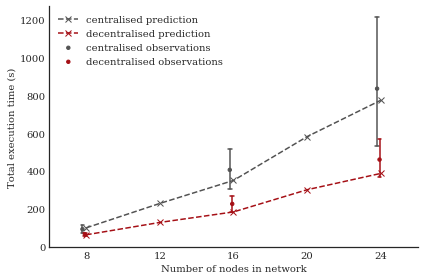

In [17]:
fig, ax = plt.subplots(1)

ax = sns.pointplot(x="numnodes", y="totaltime",hue='strategy',ax=ax, data=inter,
                   palette=['#525252','#a50f15'],ci=95,join=False,
                   capsize=.05, alpha=0.6, scale=0.5,errwidth=1.5, dodge=True)

def get_pred(df, numnodes):
    return df[df['numnodes']==numnodes]['prediction'].mean()
#realdfdd = [get_pred(decenter,i) for i in [8,16,24]]
ax.plot([tick for tick in ax.get_xticks()],fddreds['prediction'], color ='#525252'
        ,linestyle='--', label='centralised prediction', marker='x')
ax.plot([tick for tick in ax.get_xticks()],dfddreds['prediction'], color ='#a50f15'
        ,linestyle='--', label='decentralised prediction', marker='x')
ylabels = [int(label/1000) for label in ax.get_yticks()]
ax.set_yticklabels(ylabels)
ax.set_xlabel('Number of nodes in network')
ax.set_ylabel('Total execution time (s)')
sns.despine()
handles, labels = ax.get_legend_handles_labels()
legend = ax.legend(handles[0:4], labels[0:4],loc='best')
frame = legend.get_frame()
frame.set_facecolor('white')
frame.set_edgecolor('white')
fig.tight_layout()
print(handles, labels)
fig.savefig('24node.png',format='png', dpi=600)

In [12]:
pwd

'/home/james/Dropbox (MIT)/All_Resourceful/dag_planner/dag-plan'

In [61]:
df

,numnodes,description,id,totaltime,prediction,average,strategy
0,24,fdd_0,jjlong33kzw,1344522,771153,835681.66670,centralised observations
1,24,fdd_0,jjlong0602c,545215,771153,NaN,centralised observations
2,24,fdd_0,jjlong3ndkn,1924623,771153,NaN,centralised observations
3,24,fdd_0,jjlongjektg,153157,771153,NaN,centralised observations
4,24,fdd_0,jjlongp0c84,362010,771153,NaN,centralised observations
5,24,fdd_0,jjlongrcqgv,300148,771153,NaN,centralised observations
6,24,fdd_0,jjlongahpko,602393,771153,NaN,centralised observations
7,24,fdd_0,jjlongwvgfr,227362,771153,NaN,centralised observations
8,24,fdd_0,jjlongxw2t2,361855,771153,NaN,centralised observations
9,24,fdd_0,jjlong1hff8,493877,771153,NaN,centralised observations


[(0, 0, 0.0), (0, 64, 41.34), (0, 68, 51.12), (0, 69, 31.55), (0, 96, 31.55), (0, 15, 21.76), (0, 17, 41.34), (0, 18, 41.34), (0, 22, 21.76), (0, 95, 41.34), (0, 32, 31.55), (0, 37, 31.55), (0, 39, 51.12), (0, 40, 31.55), (0, 41, 41.34), (0, 43, 31.55), (0, 46, 41.34), (0, 49, 31.55), (0, 53, 41.34), (0, 55, 60.91), (0, 56, 41.34), (0, 58, 70.7), (0, 31, 11.97), (0, 61, 41.34), (0, 63, 51.12), (64, 64, 0.0), (68, 0, 30.0), (68, 64, 9.79), (68, 68, 0.0), (68, 69, 9.79), (68, 96, 19.58), (68, 15, 19.58), (68, 17, 19.58), (68, 18, 9.79), (68, 22, 19.58), (68, 95, 9.79), (68, 32, 19.58), (68, 37, 9.79), (68, 39, 19.58), (68, 40, 9.79), (68, 41, 19.58), (68, 43, 19.58), (68, 46, 9.79), (68, 49, 9.79), (68, 53, 9.79), (68, 55, 9.79), (68, 56, 19.58), (68, 58, 19.58), (68, 31, 9.83), (68, 61, 19.58), (68, 63, 19.58), (69, 0, 36.39), (69, 64, 19.58), (69, 68, 29.36), (69, 69, 0.0), (69, 96, 9.79), (69, 15, 39.15), (69, 17, 39.15), (69, 18, 39.15), (69, 22, 39.16), (69, 95, 9.79), (69, 32, 19.5

/usr/local/lib/python3.4/dist-packages/networkx/drawing/nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
/usr/local/lib/python3.4/dist-packages/networkx/drawing/nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
/usr/local/lib/python3.4/dist-packages/matplotlib/__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
/usr/local/lib/python3.4/dist-packages/matplotlib/rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.hold is deprecated, will be removed in 3.0")


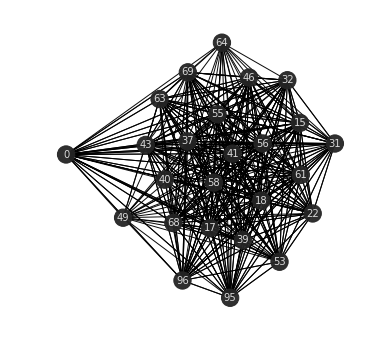

In [12]:
posit = lambda d:{target:value for target, value in d.items()}
pos_rssi = {k: posit(v) for k,v in bw.items()}
n = len(bw)
tplify = lambda k,vals: [(k,v,rssi) for v, rssi in vals.items()]
wrapup = lambda triplelist: {(item[0], item[1]):item[2] for item in triplelist}
flattener = lambda lsts: itertools.chain(*lsts)
tplified = list(flattener([tplify(source, targets) for source, targets in pos_rssi.items()]))
edge_labels = wrapup(tplified)
weighter = lambda d: {k:{'weight':v} for k,v in d.items()}
weighted_rssi = {k:weighter(v) for k,v in pos_rssi.items()}
import networkx as nx
fig, ax = plt.subplots(1)
fig.set_size_inches(6,6)
g = nx.DiGraph()
g.add_weighted_edges_from(tplified)

init = {k:(k[0]/96,k[1]/96) for k,v in edge_labels.items()}
pos=nx.spring_layout(g, pos=init,fixed=[0],weight='weight',k=0.5, iterations=1000)
def sample_labels(edge_labels):
    return{k:v for k,v in edge_labels.items() if k[0] in [0,41,21] or k[1] in [0,41,21]}
#print('g: ',g)
colors = ['#252525' for i in range(9)]
print(tplified)
node_idxs = {k:idx for idx,k in enumerate(g)}
print(node_idxs)
#colors[node_idxs[21]]='#a50f15'
#colors[node_idxs[41]] ='#737373'
bprops = dict(boxstyle="circle,pad=0", fc='white', ec='white',alpha = 1, lw=0)
a = nx.draw(g,pos,ax=ax,with_labels=False, node_color =colors, alpha=0.95,arrows=False)
a = nx.draw_networkx_labels(g,pos,font_size=10,  font_color='#d9d9d9')
#a = nx.draw_networkx_edge_labels(g, pos, edge_labels=sample_labels(edge_labels), label_pos=0.5
#                            ,font_size=8, font_color='#525252', font_family='serif'
#                            ,font_weight='normal', alpha=1, bbox=bprops
#                             ,ax=ax, rotate=True)
#fig.savefig('graph.png', dpi=600, format='png')